In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
# from google.colab import drive #toimport google drive data

In [39]:
# drive.mount('/content/drive') #to mount the drive data into colab clound and enterr the activation code

In [40]:
# cd /content/drive/"My Drive"

In [41]:
columnname=['area','bedrooms','price']
dataset=pd.read_csv("ex1data2.txt",names=columnname)
dataset.head()

,area,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [42]:
dataset.shape

(47, 3)

In [43]:
type(dataset)

pandas.core.frame.DataFrame

In [44]:
dataset.describe()

,area,bedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [45]:
area_value = dataset.iloc[0:dataset.shape[0],0:1]
area_value.head()

,area
0,2104
1,1600
2,2400
3,1416
4,3000


In [46]:
bedroom_value = dataset.iloc[0:dataset.shape[0],1:2]
bedroom_value.head()

,bedrooms
0,3
1,3
2,3
3,2
4,4


In [47]:
price_value = dataset.iloc[0:dataset.shape[0],2:3]
price_value.head()

,price
0,399900
1,329900
2,369000
3,232000
4,539900


In [48]:
type(price_value.values)

numpy.ndarray

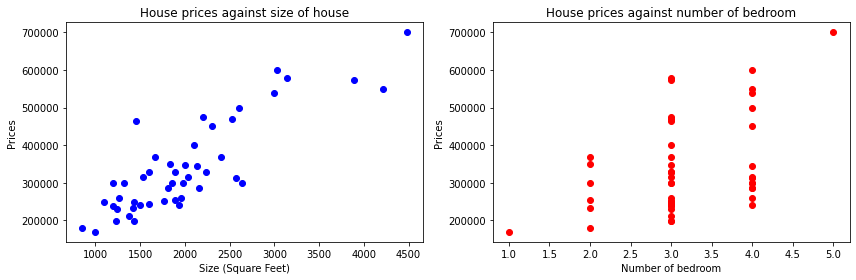

In [49]:
# Create 2 subplot, 1 for each variable
fig, axes = plt.subplots(figsize=(12,4),nrows=1,ncols=2)

axes[0].scatter(area_value,price_value,color="b")
axes[0].set_xlabel("Size (Square Feet)")
axes[0].set_ylabel("Prices")
axes[0].set_title("House prices against size of house")
axes[1].scatter(bedroom_value,price_value,color="r")
axes[1].set_xlabel("Number of bedroom")
axes[1].set_ylabel("Prices")
#axes[1].set_xticks(np.arange(1,6,step=1))
axes[1].set_title("House prices against number of bedroom")

# Enhance layout
plt.tight_layout()

In [50]:
#feature normalization

In [51]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [65]:
data_norm=dataset.values    # converts from dataframe to array
m2=len(data_norm[:,-1])     # last column size
X2=data_norm[:,0:2].reshape(m2,2)   # m2 rows and 2 columns
# X2 has all the features i.e. size and bedrooms
X2, mean_X2, std_X2 = featureNormalization(X2)  # normalize X2
X2 = np.append(np.ones((m2,1)),X2,axis=1)                                     # append the 1's array in X2 at first
y2=data_norm[:,-1].reshape(m2,1)                                              # price estimate
theta2=np.zeros((3,1))

In [66]:
df = pd.DataFrame(data_norm)
df.describe()

,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [55]:
X2

array([[ 1.00000000e+00,  1.31415422e-01, -2.26093368e-01],
       [ 1.00000000e+00, -5.09640698e-01, -2.26093368e-01],
       [ 1.00000000e+00,  5.07908699e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.43677059e-01, -1.55439190e+00],
       [ 1.00000000e+00,  1.27107075e+00,  1.10220517e+00],
       [ 1.00000000e+00, -1.99450507e-02,  1.10220517e+00],
       [ 1.00000000e+00, -5.93588523e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.29685755e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.89466782e-01, -2.26093368e-01],
       [ 1.00000000e+00, -6.44465993e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.71822042e-02,  1.10220517e+00],
       [ 1.00000000e+00, -8.65999486e-04, -2.26093368e-01],
       [ 1.00000000e+00, -1.40779041e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.15099326e+00,  2.43050370e+00],
       [ 1.00000000e+00, -9.31923697e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.80715024e-01,  1.10220517e+00],
       [ 1.00000000e+00, -8.65782986e-01

In [56]:
# define cost function
def cost_function(theta_array, x1_value, x2_train, y_value, m):
    # This function returns our cost function value at particular theta values
    total_error = 0
    for i in range(m):
        total_error += ((theta_array[0] + theta_array[1]*x1_value[i] + x2_train[i]*theta_array[2]) - y_value[i])**2
    return total_error/(2*m)

In [57]:
# initialize regularization parameters
# initializing values of thetas
theta_0 = 0  # bias
theta_1 = 0  # weight of 1st feature
theta_2 = 0 # weight of 2nd feature

# defining a learning rate
alpha = 0.01

# Setting the number of iterations
iters = 500

In [58]:
# define hypothesis
def hypothesis(theta_array, x1,x2):
    # Returns value of hypothesis at the point corresponding to the 'x' entry
    # H(x) = theta_0 + theta_1*x1+ theta_2*x2
    return theta_array[0] + theta_array[1]*x1+ theta_array[2]*x2

In [59]:
# update the values of theta by gradient descent
def improvise_thetas(theta_array, X1,X2, Y, alpha, m):
    ''' This function updates the values of theta_0 and theta_1 and returns an array containing
            the updated theta values. This is where gradient descent takes place '''

    # initializing summations to zero
    summation_0 = 0
    summation_1 = 0
    summation_2 = 0
    for i in range(m):        # finding the value of summations and finally the value of
        summation_0 += (theta_array[0] + theta_array[1]*X1[i]+theta_array[2]*X2[i]) - Y[i]

        summation_1 += X1[i]*((theta_array[0] + theta_array[1]*X1[i]+theta_array[2]*X2[i])-Y[i])
        summation_2 += X2[i]*((theta_array[0] + theta_array[1]*X1[i]+theta_array[2]*X2[i])-Y[i])

    new_theta_0 = theta_array[0] - alpha * (summation_0) / m
    new_theta_1 = theta_array[1] - alpha * (summation_1) / m
    new_theta_2 = theta_array[2] - alpha * (summation_2) / m

    updated_theta_array = [new_theta_0, new_theta_1,new_theta_2]
    print(updated_theta_array)
    return updated_theta_array

In [60]:
# minimizing cost function error
def training(x1_train,x2_train, y_train, alpha, iters):
    # This is the function which takes care of the RegressionS
    # Finding size of the training data
    m = x1_train.size
    print(m)
    # initializing values of thetas
    theta_0 = 0     # bias
    theta_1 = 0     # weight
    theta_2 = 0
    # creating a weight matrix which contains both theta_0 and theta_1
    theta_array = [theta_0, theta_1, theta_2]
    # creating an array that stores the values of the cost function during each iteration
    cost_function_values = []
    for i in range(iters):
        # changing the values of theta 0 and theta 1 according to the gradient descent method
        theta_array = improvise_thetas(theta_array, x1_train,x2_train, y_train, alpha, m)
        # storing values of the cost function after every improvisation step (gradient descent step)
        cost_function_values.append(cost_function(theta_array, x1_train, x2_train, y_train, m))
        # print values every 10 iterations
        if i % 10 == 0:
            print('value of theta_0 at iteration %d is: ' % i, theta_array[0])
            print('value of theta_1 at iteration %d is: ' % i, theta_array[1])
            print('value of theta_2 at iteration %d is: ' % i, theta_array[2], '\n')
            ynew=x1_train*theta_array[1]+x2_train*theta_array[2]+theta_array[0]
            #plt.plot(x_train1,ynew,'r')
            #plt.scatter(x_train1,y_train)
            #plt.show()
    # Plot our cost function's progress over our training period to check if the model has learnt
    x = np.arange(0, len(cost_function_values), step=1)
    plt.plot(x, cost_function_values, "-b", label="Cost Function Curve")
    plt.title("Learning Curve")
    plt.xlabel("Number Of Iterations")
    plt.ylabel("Cost Function Value")
    plt.legend()
    plt.show()
    print("Cost function values: ",cost_function_values)
    # By returning our theta_array and saving it we are basically saving our trained model
    return theta_array

47
[array([3404.12659574]), array([1057.64133493]), array([547.08821756])]
value of theta_0 at iteration 0 is:  [3404.12659574]
value of theta_1 at iteration 0 is:  [1057.64133493]
value of theta_2 at iteration 0 is:  [547.08821756] 

[array([6774.21192553]), array([2101.64274191]), array([1082.78310833])]
[array([10110.59640202]), array([3132.20441912]), array([1607.2749847])]
[array([13413.61703375]), array([4149.52349706]), array([2120.75113489])]
[array([16683.60745915]), array([5153.79408617]), array([2623.39587038])]
[array([19920.89798031]), array([6145.20732373]), array([3115.39057257])]
[array([23125.81559625]), array([7123.95141992]), array([3596.91373875])]
[array([26298.68403603]), array([8090.21170335]), array([4068.14102732])]
[array([29439.82379141]), array([9044.17066566]), array([4529.2453023])]
[array([32549.55214924]), array([9986.00800564]), array([4980.39667721])]
[array([35628.1832235]), array([10915.90067247]), array([5421.76255814])]
value of theta_0 at iteratio

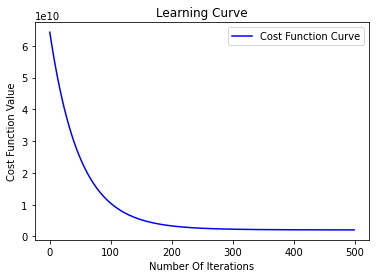

Cost function values:  [array([6.42977763e+10]), array([6.30310183e+10]), array([6.17906942e+10]), array([6.05762369e+10]), array([5.93870917e+10]), array([5.82227165e+10]), array([5.70825809e+10]), array([5.59661664e+10]), array([5.48729661e+10]), array([5.3802484e+10]), array([5.27542352e+10]), array([5.17277455e+10]), array([5.07225512e+10]), array([4.97381986e+10]), array([4.87742442e+10]), array([4.78302542e+10]), array([4.69058042e+10]), array([4.60004793e+10]), array([4.51138734e+10]), array([4.42455895e+10]), array([4.33952394e+10]), array([4.25624431e+10]), array([4.1746829e+10]), array([4.09480338e+10]), array([4.01657018e+10]), array([3.93994853e+10]), array([3.86490441e+10]), array([3.79140452e+10]), array([3.71941632e+10]), array([3.64890795e+10]), array([3.57984824e+10]), array([3.51220671e+10]), array([3.44595353e+10]), array([3.38105953e+10]), array([3.31749615e+10]), array([3.25523545e+10]), array([3.19425011e+10]), array([3.13451339e+10]), array([3.07599912e+10]), arr

In [61]:
# training time!
price_value.values
theta_array = training(X2[:,1:2],X2[:,2:3], y2, alpha, iters)   #to convert dataframe to array y using .values

print("the final value of theta_0 is ",theta_array[0])
print("the final value of theta_1 is ",theta_array[1])
print("the final value of theta_2 is ",theta_array[2])

In [62]:
theta_array

[array([338175.98396731]), array([103032.12432974]), array([-202.3252331])]

In [63]:
predict=hypothesis(theta_array,2,1416)     #making predictions using the optimized Θ values for a 1650 square feet house with 3 bedrooms
predict

array([257747.70255197])